## Clustering

Importing the Libraries

In [58]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

1.Loading Train Data

In [59]:
train = pd.read_csv("ALS_TrainingData_2223.csv")
train.head()


,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


Finding the number of rows and columns in training data

In [60]:
train.shape

(2223, 101)

In [61]:
train

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.00,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.00,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.00,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.00,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.00,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,2419,33,50.0,49.0,45.0,0.008772,-0.239501,35,32.5,30,...,136.0,0.014035,997136,7,5.0,5,0.003643,7.00,6.0,5.0
2219,2420,61,47.0,45.0,42.0,0.009074,-0.388711,31,26.0,17,...,141.0,0.009074,998047,5,4.0,3,0.003630,7.41,5.5,5.0
2220,2421,47,46.0,44.0,41.0,0.012111,-0.108631,26,23.0,20,...,135.0,0.013123,998773,5,4.0,4,0.001825,9.00,6.0,5.0
2221,2422,37,49.0,44.0,39.0,0.017857,-0.855880,34,29.5,21,...,136.0,0.007143,998908,8,4.5,2,0.010714,6.00,5.0,5.0


## 1.Loading Test Data

In [62]:
test = pd.read_csv("ALS_TestingData_78 (1).csv")
test.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Urine.Ph_range,White.Blood.Cell..WBC._max,White.Blood.Cell..WBC._median,White.Blood.Cell..WBC._min,White.Blood.Cell..WBC._range
0,3,65.906849,46.0,44.0,43,0.024590,-1.767329,33,5.0,2,...,0,0.006440,6.5,6.00,6.0,0.004098,8.57,7.680,6.60,0.016148
1,4,54.000000,39.0,36.0,33,0.013100,-1.351852,32,23.0,14,...,0,0.013100,6.5,5.50,5.0,0.003275,8.04,6.620,4.97,0.006703
2,5,56.394521,46.0,43.0,39,0.009736,-0.412429,15,10.0,2,...,0,0.000000,7.5,6.75,6.0,0.003456,8.90,7.160,5.01,0.005410
3,6,72.619178,50.0,42.5,41,0.092784,-0.383403,34,24.0,21,...,5,0.007752,7.5,7.00,6.0,0.024194,12.38,7.905,4.96,0.076495
4,9,65.000000,45.0,42.0,36,0.021327,0.000000,37,37.0,37,...,7,0.000000,6.0,5.50,5.0,0.002370,11.53,9.290,7.94,0.008507


Finding the number of rows and columns in testing data

In [63]:
test.shape

(78, 131)

In [64]:
test

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Urine.Ph_range,White.Blood.Cell..WBC._max,White.Blood.Cell..WBC._median,White.Blood.Cell..WBC._min,White.Blood.Cell..WBC._range
0,3,65.906849,46.0,44.0,43,0.024590,-1.767329,33,5.0,2,...,0,0.006440,6.5,6.00,6.0,0.004098,8.57,7.680,6.60,0.016148
1,4,54.000000,39.0,36.0,33,0.013100,-1.351852,32,23.0,14,...,0,0.013100,6.5,5.50,5.0,0.003275,8.04,6.620,4.97,0.006703
2,5,56.394521,46.0,43.0,39,0.009736,-0.412429,15,10.0,2,...,0,0.000000,7.5,6.75,6.0,0.003456,8.90,7.160,5.01,0.005410
3,6,72.619178,50.0,42.5,41,0.092784,-0.383403,34,24.0,21,...,5,0.007752,7.5,7.00,6.0,0.024194,12.38,7.905,4.96,0.076495
4,9,65.000000,45.0,42.0,36,0.021327,0.000000,37,37.0,37,...,7,0.000000,6.0,5.50,5.0,0.002370,11.53,9.290,7.94,0.008507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,96,45.000000,42.0,39.5,37,0.010823,-0.683521,33,28.0,23,...,5,0.004329,6.0,5.50,5.0,0.002165,12.45,8.370,5.56,0.014913
74,97,47.709589,47.0,44.0,41,0.005381,-0.324733,26,19.0,11,...,0,0.005381,7.5,6.00,5.5,0.001845,13.92,10.265,8.37,0.004978
75,98,59.928767,47.0,44.0,40,0.009333,-0.330616,33,24.0,10,...,1,0.008000,7.5,6.50,6.0,0.002000,16.69,5.445,4.48,0.016280
76,99,61.000000,42.0,39.0,38,0.007843,-0.439230,37,33.0,31,...,4,0.005882,6.5,6.00,5.5,0.001961,10.66,7.390,5.81,0.009510


## 1.Data Preprocessing (Preparing the data)

Clean the data by removing NAN values and unnecessary columns in the data set

In [65]:
train.isnull()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2219,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2220,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2221,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


To check if there is any NAN value/ empty values/ missing values

In [66]:

train.isnull().sum()

ID                 0
Age_mean           0
Albumin_max        0
Albumin_median     0
Albumin_min        0
                  ..
trunk_min          0
trunk_range        0
Urine.Ph_max       0
Urine.Ph_median    0
Urine.Ph_min       0
Length: 101, dtype: int64

In [67]:
test.isnull()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Urine.Ph_range,White.Blood.Cell..WBC._max,White.Blood.Cell..WBC._median,White.Blood.Cell..WBC._min,White.Blood.Cell..WBC._range
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
74,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
75,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
76,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [68]:
test.isnull().sum()

ID                               0
Age_mean                         0
Albumin_max                      0
Albumin_median                   0
Albumin_min                      0
                                ..
Urine.Ph_range                   0
White.Blood.Cell..WBC._max       0
White.Blood.Cell..WBC._median    0
White.Blood.Cell..WBC._min       0
White.Blood.Cell..WBC._range     0
Length: 131, dtype: int64

Dropping unwanted columns in train data

In [69]:
train = train.drop(labels=['ID','SubjectID'],axis=1,)
train
train.shape


(2223, 99)

Dropping unwanted columns in test data

In [70]:
test = test.drop(labels=['ID','SubjectID'],axis=1,)
test
test.shape

(78, 129)

In [71]:
train.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,...,145.5,143.0,0.017422,8,7.0,7,0.002646,6.0,6.0,6.0
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,...,138.0,136.0,0.010453,8,7.0,5,0.005386,7.0,5.0,5.0
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,...,143.0,140.0,0.008929,5,0.0,0,0.008929,6.0,5.0,5.0
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,...,139.0,138.0,0.012469,5,5.0,3,0.004988,7.0,6.0,5.0
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,...,140.0,138.0,0.008292,6,4.0,1,0.008489,6.0,5.0,5.0


In [72]:
test.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Urine.Ph_range,White.Blood.Cell..WBC._max,White.Blood.Cell..WBC._median,White.Blood.Cell..WBC._min,White.Blood.Cell..WBC._range
0,65.906849,46.0,44.0,43,0.024590,-1.767329,33,5.0,2,0.028519,...,0,0.006440,6.5,6.00,6.0,0.004098,8.57,7.680,6.60,0.016148
1,54.000000,39.0,36.0,33,0.013100,-1.351852,32,23.0,14,0.039301,...,0,0.013100,6.5,5.50,5.0,0.003275,8.04,6.620,4.97,0.006703
2,56.394521,46.0,43.0,39,0.009736,-0.412429,15,10.0,2,0.017173,...,0,0.000000,7.5,6.75,6.0,0.003456,8.90,7.160,5.01,0.005410
3,72.619178,50.0,42.5,41,0.092784,-0.383403,34,24.0,21,0.033592,...,5,0.007752,7.5,7.00,6.0,0.024194,12.38,7.905,4.96,0.076495
4,65.000000,45.0,42.0,36,0.021327,0.000000,37,37.0,37,0.000000,...,7,0.000000,6.0,5.50,5.0,0.002370,11.53,9.290,7.94,0.008507


## 2. Summary and preliminary visualization of data

In [73]:
train.describe()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,...,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,54.550157,47.011134,43.952542,40.766347,0.013779,-0.728274,31.692308,27.104926,19.877193,0.026035,...,140.145254,136.755061,0.015000,6.203779,4.893387,2.955915,0.007136,6.820450,5.710639,5.183221
std,11.396546,3.233980,2.654804,3.193087,0.009567,0.622329,5.314228,6.633643,8.583509,0.016156,...,1.789886,2.715247,0.009283,1.747660,2.146076,2.358095,0.004503,0.932141,0.625039,0.437222
min,18.000000,37.000000,34.500000,24.000000,0.000000,-4.345238,11.000000,2.500000,0.000000,0.000000,...,128.000000,112.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000
25%,47.000000,45.000000,42.000000,39.000000,0.009042,-1.086310,29.000000,23.000000,14.000000,0.014035,...,139.000000,135.000000,0.010582,5.000000,3.000000,1.000000,0.003643,6.000000,5.000000,5.000000
50%,55.000000,47.000000,44.000000,41.000000,0.012111,-0.620748,33.000000,28.000000,20.000000,0.023297,...,140.000000,137.000000,0.013123,7.000000,5.000000,3.000000,0.006920,7.000000,6.000000,5.000000
75%,63.000000,49.000000,46.000000,43.000000,0.015873,-0.283832,36.000000,32.000000,27.000000,0.034799,...,141.000000,138.000000,0.017278,8.000000,6.500000,5.000000,0.009639,7.000000,6.000000,5.000000
max,81.000000,70.300000,51.100000,49.000000,0.243902,1.207011,40.000000,40.000000,40.000000,0.117647,...,146.500000,145.000000,0.142857,8.000000,8.000000,8.000000,0.042017,9.000000,9.000000,8.000000


In [74]:
test.describe()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Urine.Ph_range,White.Blood.Cell..WBC._max,White.Blood.Cell..WBC._median,White.Blood.Cell..WBC._min,White.Blood.Cell..WBC._range
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,...,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,56.025571,45.256410,42.173077,38.910256,0.016753,-0.825866,29.807692,21.544872,14.705128,0.028159,...,1.871795,0.007133,7.076923,6.192308,5.564103,0.004544,9.341795,6.789103,5.286026,0.012203
std,10.514606,3.056549,3.083341,3.977815,0.013419,0.649497,6.107389,8.995015,9.532050,0.014650,...,2.211886,0.003980,0.674570,0.572536,0.458392,0.004776,2.939529,1.683264,1.513861,0.014724
min,24.583562,38.000000,35.000000,25.000000,0.004138,-3.041667,13.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,6.000000,5.500000,5.000000,0.000000,4.110000,3.240000,1.430000,0.003078
25%,51.000000,43.000000,40.000000,36.250000,0.011006,-1.315287,26.000000,16.500000,8.000000,0.017005,...,0.000000,0.004490,6.500000,5.812500,5.000000,0.002278,7.767500,5.878750,4.330000,0.005658
50%,57.000000,45.500000,42.250000,39.000000,0.013761,-0.679723,31.000000,22.000000,14.000000,0.026720,...,1.000000,0.006365,7.000000,6.000000,5.500000,0.003390,8.750000,6.720000,5.320000,0.008402
75%,62.180822,47.000000,44.000000,41.000000,0.018015,-0.390660,34.000000,28.000000,21.000000,0.035912,...,3.000000,0.009639,7.500000,6.500000,6.000000,0.004715,10.690000,7.730000,6.125000,0.012471
max,77.000000,51.000000,49.000000,47.000000,0.092784,0.325893,40.000000,39.000000,37.000000,0.068522,...,7.000000,0.019048,9.000000,7.500000,7.000000,0.034483,22.490000,11.795000,9.500000,0.092045


In [121]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 100 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age_mean                          2223 non-null   int64  
 1   Albumin_max                       2223 non-null   float64
 2   Albumin_median                    2223 non-null   float64
 3   Albumin_min                       2223 non-null   float64
 4   Albumin_range                     2223 non-null   float64
 5   ALSFRS_slope                      2223 non-null   float64
 6   ALSFRS_Total_max                  2223 non-null   int64  
 7   ALSFRS_Total_median               2223 non-null   float64
 8   ALSFRS_Total_min                  2223 non-null   int64  
 9   ALSFRS_Total_range                2223 non-null   float64
 10  ALT.SGPT._max                     2223 non-null   float64
 11  ALT.SGPT._median                  2223 non-null   float64
 12  ALT.S

In [122]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Columns: 129 entries, Age_mean to White.Blood.Cell..WBC._range
dtypes: float64(92), int64(37)
memory usage: 78.7 KB


array([[<AxesSubplot:title={'center':'Age_mean'}>,
        <AxesSubplot:title={'center':'Albumin_max'}>,
        <AxesSubplot:title={'center':'Albumin_median'}>,
        <AxesSubplot:title={'center':'Albumin_min'}>,
        <AxesSubplot:title={'center':'Albumin_range'}>,
        <AxesSubplot:title={'center':'ALSFRS_slope'}>,
        <AxesSubplot:title={'center':'ALSFRS_Total_max'}>,
        <AxesSubplot:title={'center':'ALSFRS_Total_median'}>,
        <AxesSubplot:title={'center':'ALSFRS_Total_min'}>,
        <AxesSubplot:title={'center':'ALSFRS_Total_range'}>,
        <AxesSubplot:title={'center':'ALT.SGPT._max'}>],
       [<AxesSubplot:title={'center':'ALT.SGPT._median'}>,
        <AxesSubplot:title={'center':'ALT.SGPT._min'}>,
        <AxesSubplot:title={'center':'ALT.SGPT._range'}>,
        <AxesSubplot:title={'center':'AST.SGOT._max'}>,
        <AxesSubplot:title={'center':'AST.SGOT._median'}>,
        <AxesSubplot:title={'center':'AST.SGOT._min'}>,
        <AxesSubplot:title={'ce

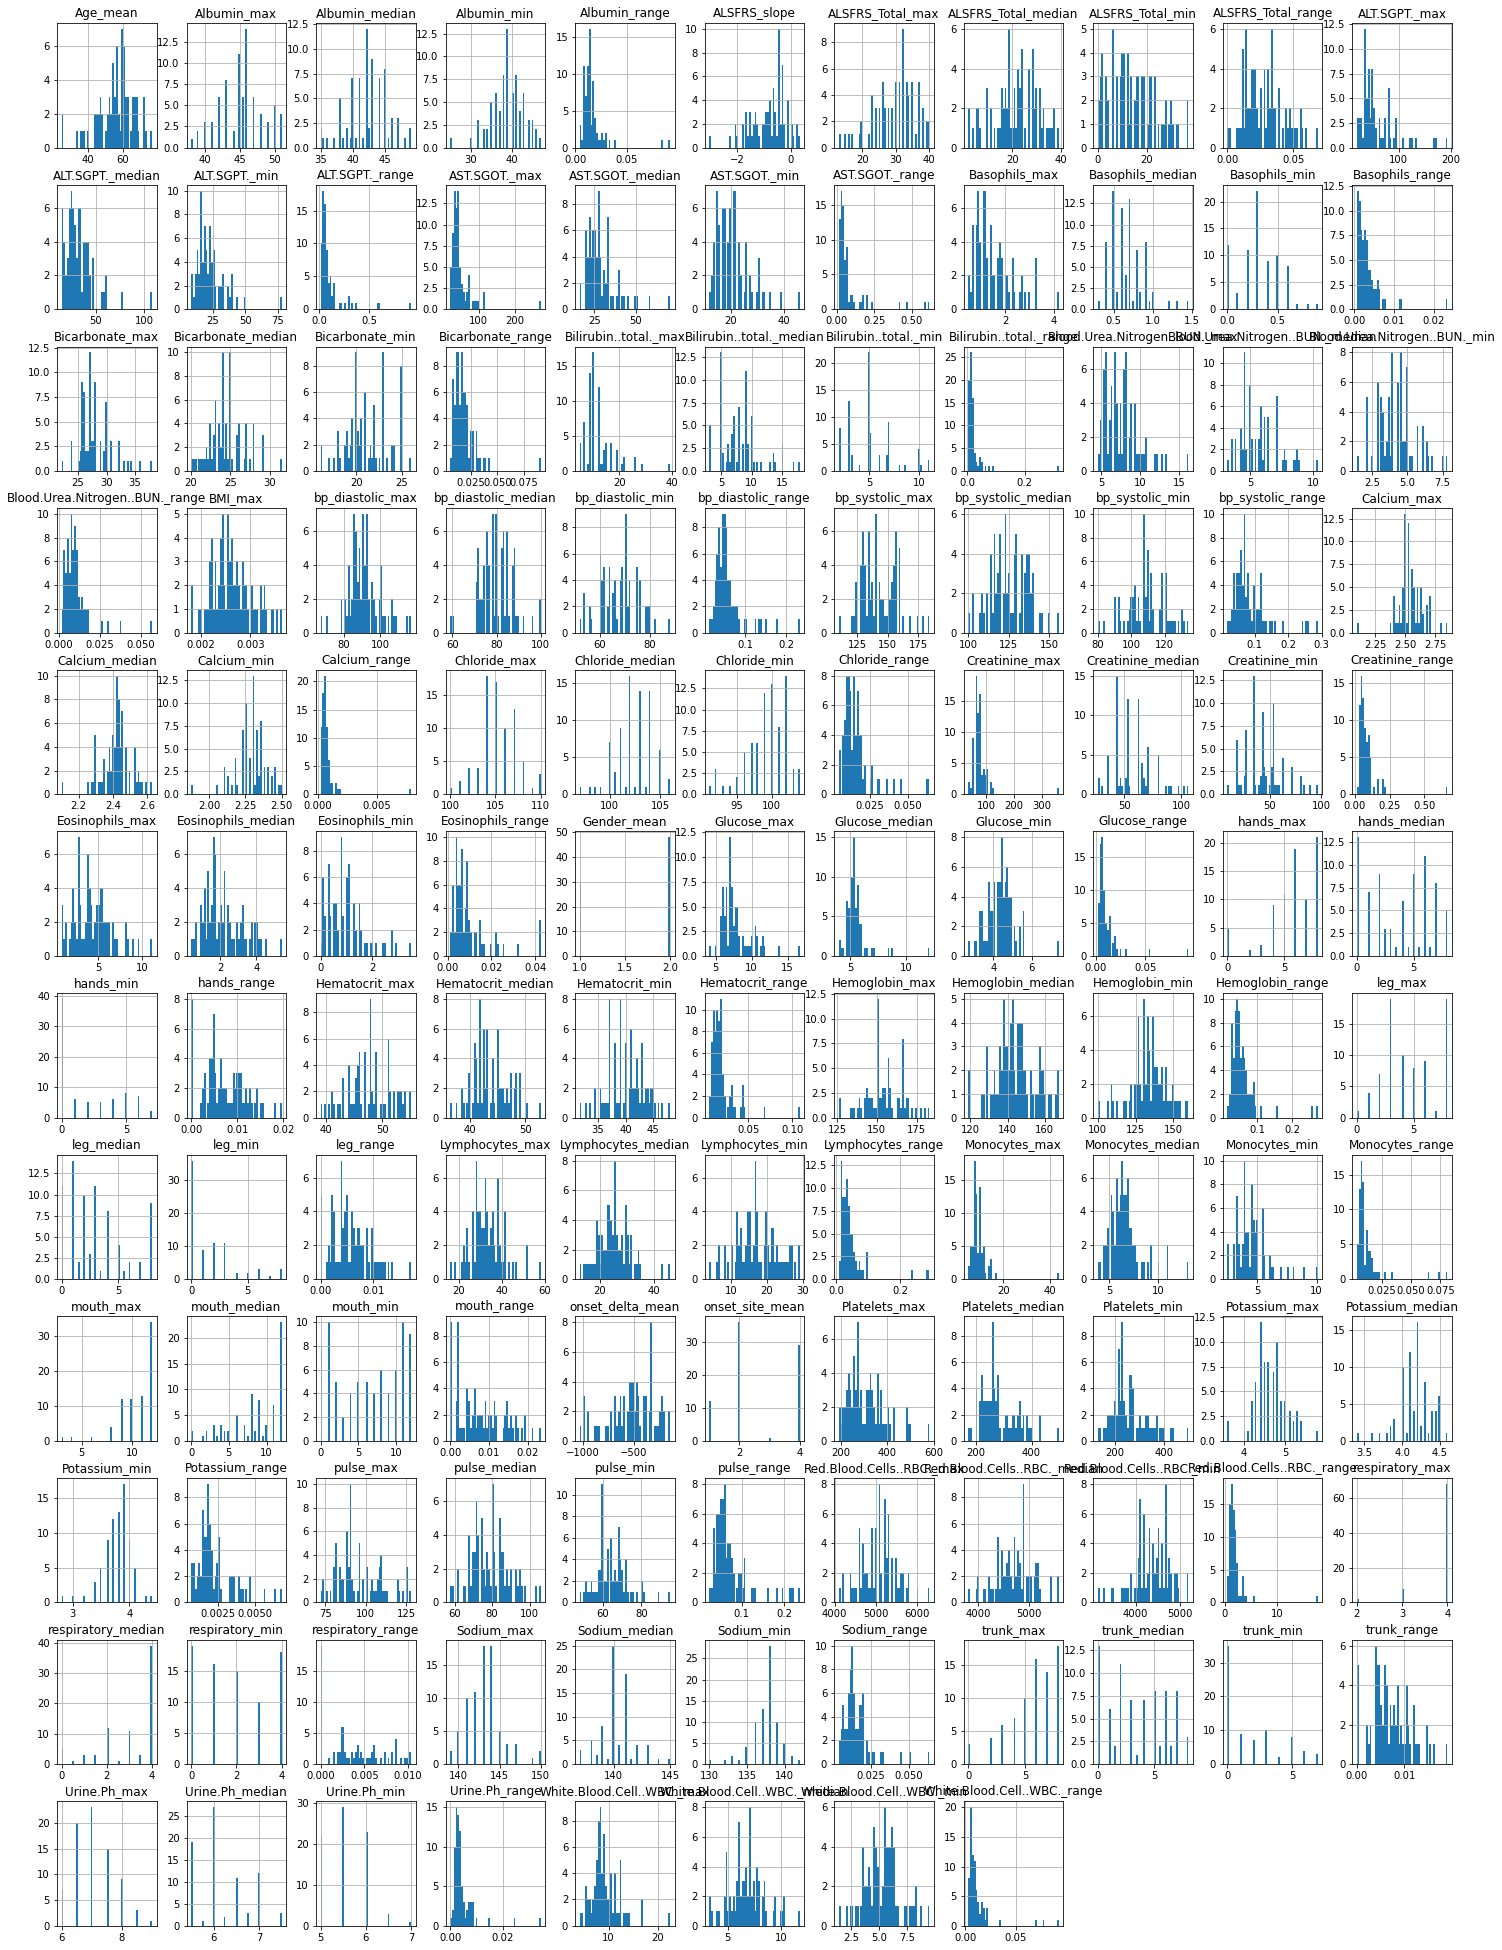

In [75]:
test.hist(figsize=(25,35),bins=50)

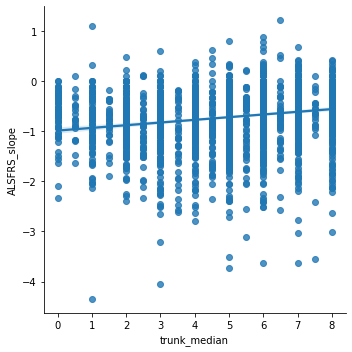

In [76]:
sns.lmplot(x='trunk_median',y='ALSFRS_slope',data=train,fit_reg=True)

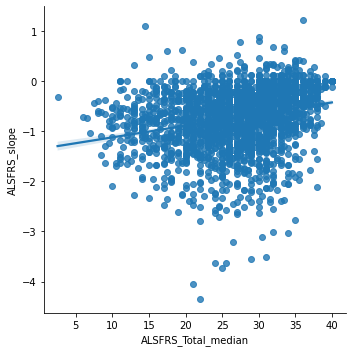

In [77]:
sns.lmplot(x='ALSFRS_Total_median',y='ALSFRS_slope',data=train,fit_reg=True)

creating scatter plot for Urine.Ph_median and ALSFRS_slope

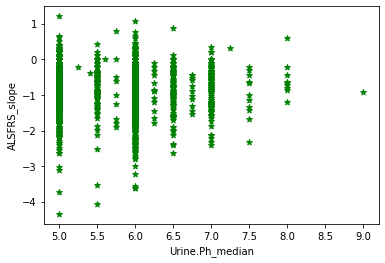

In [78]:
plt.scatter(train['Urine.Ph_median'],train['ALSFRS_slope'], marker='*', color='green')
plt.xlabel('Urine.Ph_median')
plt.ylabel('ALSFRS_slope')
plt.show()

## 3.Train a k-Means model on the data, experiment at least two different k values, and explain which k value is a better choice.

In [79]:
from sklearn.decomposition import PCA


In [80]:
pca = PCA(n_components=2)

In [81]:
X_train = pca.fit_transform(train)
X_test = pca.fit_transform(test)

In [82]:
X_train.shape

(2223, 2)

In [83]:
X_test.shape

(78, 2)

In [84]:
X_train

array([[ 342.44835464, -137.81670367],
       [-341.98257993,   21.96392395],
       [ 498.92660568,  -62.59357922],
       ...,
       [ 906.43338778,  -34.832447  ],
       [-124.33659957,  -24.37602751],
       [-480.89037521,   89.41959222]])

In [85]:
X_test

array([[  214.00621186,  -258.98012049],
       [ -845.45044332,   315.66955858],
       [  121.42434596,  -292.10044745],
       [ 1290.45020343,  -101.61071939],
       [   33.40793728,   126.59182737],
       [ 1591.20898463,    82.45625888],
       [  -90.24922526,   106.25787088],
       [  212.46277873,    80.67481231],
       [   29.25100536,   -39.56287674],
       [ -433.86267273,    -4.07335782],
       [  276.57904811,  -499.03613504],
       [ -762.9847835 ,   140.16816152],
       [  482.61836019,    50.49175634],
       [ -229.4468784 ,   329.41119946],
       [  677.47260674,    47.08176547],
       [   27.87367234,  -139.70246011],
       [-1202.43188358,  -306.5490243 ],
       [ -585.50238209,  -108.29600296],
       [ -429.12741591,   207.94658286],
       [ -319.19049125,   -98.57688243],
       [ -369.20424714,    86.71161454],
       [  -46.17272053,  -152.1221227 ],
       [ -261.72405324,   -15.71960618],
       [-1537.32725964,   507.8497168 ],
       [  -98.88

Elbow method to find the best K value

In [86]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X_train)
    sse.append(km.inertia_)

In [87]:
sse

[397268187.9545109,
 138566713.80386677,
 76109752.84441544,
 53946907.07716712,
 43456725.26455361,
 37032766.23335695,
 32745684.582754925,
 29206099.33543407,
 25841968.608294096]

Text(0.5, 1.0, 'Elbow method')

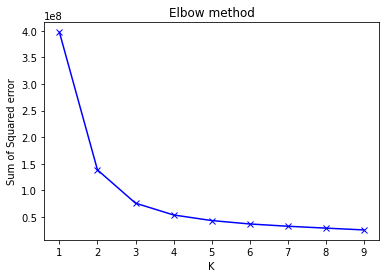

In [90]:
plt.xlabel("K")
plt.ylabel("Sum of Squared error")
plt.plot(k_rng, sse, 'bx-')
plt.title("Elbow method")

for k=2

In [109]:
km=KMeans(n_clusters=2)
y_predicted = km.fit_predict(X_train)
y_predicted
train['cluster'] = y_predicted
train

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,cluster
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,...,143.0,0.017422,8,7.0,7,0.002646,6.00,6.0,6.0,1
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,...,136.0,0.010453,8,7.0,5,0.005386,7.00,5.0,5.0,0
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,...,140.0,0.008929,5,0.0,0,0.008929,6.00,5.0,5.0,1
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,...,138.0,0.012469,5,5.0,3,0.004988,7.00,6.0,5.0,0
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,...,138.0,0.008292,6,4.0,1,0.008489,6.00,5.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,33,50.0,49.0,45.0,0.008772,-0.239501,35,32.5,30,0.009107,...,136.0,0.014035,7,5.0,5,0.003643,7.00,6.0,5.0,0
2219,61,47.0,45.0,42.0,0.009074,-0.388711,31,26.0,17,0.025408,...,141.0,0.009074,5,4.0,3,0.003630,7.41,5.5,5.0,0
2220,47,46.0,44.0,41.0,0.012111,-0.108631,26,23.0,20,0.010949,...,135.0,0.013123,5,4.0,4,0.001825,9.00,6.0,5.0,1
2221,37,49.0,44.0,39.0,0.017857,-0.855880,34,29.5,21,0.023214,...,136.0,0.007143,8,4.5,2,0.010714,6.00,5.0,5.0,0


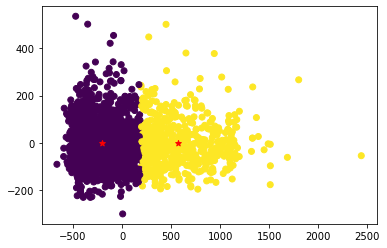

The centers for the clusters are: [[-2.02922292e+02 -3.19569537e-01]
 [ 5.73491227e+02  9.03155216e-01]]


In [110]:
plt.scatter(X_train[: ,0],X_train[: ,1],c=y_predicted)
center =km.cluster_centers_
plt.scatter(center[:,0],center[:,1],c="red",marker="*")
plt.show()
print("The centers for the clusters are:",center)

For K = 3

In [91]:
km=KMeans(n_clusters=3)
y_predicted = km.fit_predict(X_train)
y_predicted

array([2, 0, 1, ..., 1, 0, 0])

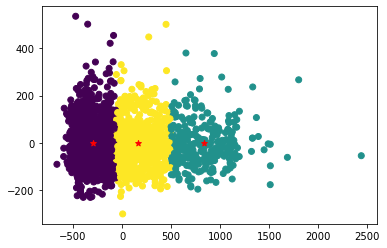

The centers fot the clusters are: [[-2.92562508e+02  5.19268717e-01]
 [ 8.31067962e+02  1.14601583e-01]
 [ 1.64393243e+02 -9.23230669e-01]]


In [98]:
plt.scatter(X_train[: ,0],X_train[: ,1],c=y_predicted)
center =km.cluster_centers_
plt.scatter(center[:,0],center[:,1],c="red",marker="*")
plt.show()
print("The centers for the clusters are:",center)

for k = 4

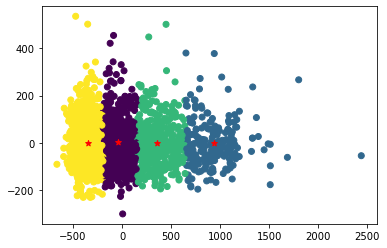

The centers for the clusters are: [[-3.83400721e+01  3.55057440e+00]
 [ 9.31859325e+02  5.64934543e-03]
 [ 3.55272428e+02 -2.02718943e-01]
 [-3.52738345e+02 -2.77590863e+00]]


In [99]:
km=KMeans(n_clusters=4)
y_predicted = km.fit_predict(X_train)
y_predicted
plt.scatter(X_train[: ,0],X_train[: ,1],c=y_predicted)
center =km.cluster_centers_
plt.scatter(center[:,0],center[:,1],c="red",marker="*")
plt.show()
print("The centers for the clusters are:",center)

Testing the model with test data

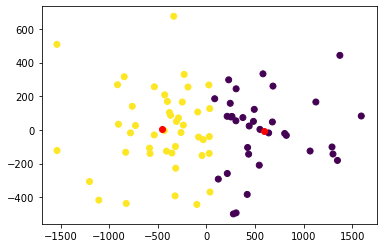

Centers for the clusters are:  [[ 595.73048638   -6.77365258]
 [-460.33719402    5.23418608]]


In [114]:
kmeans= KMeans(n_clusters=2)
kmeans.fit_predict(X_test)
b_kmeans = kmeans.predict(X_test)
b_kmeans
plt.scatter(A_test[: ,0],A_test[: ,1],c=b_kmeans)
plt.scatter(centers[:,0],centers[:,1],c="red")
plt.show()
centers =kmeans.cluster_centers_
print("Centers for the clusters are: ",centers)

## 4.Evaluating the model performance by report the center of clusters.

In [117]:
from sklearn.metrics import silhouette_score

km = KMeans(n_clusters=2, random_state=1)
km.fit(X_train)

print('Silhoutte score for model with 2 clusters: ' + str(silhouette_score(X_train, km.labels_)))

Silhoutte score for model with 2 clusters: 0.5952128875413428


In [118]:
from sklearn.metrics import silhouette_score

km = KMeans(n_clusters=3, random_state=10)
km.fit(X_train)

print('Silhoutte score for model with 3 clusters: ' + str(silhouette_score(X_train, km.labels_)))

Silhoutte score for model with 3 clusters: 0.5116391326310278


In [119]:
from sklearn.metrics import silhouette_score

km = KMeans(n_clusters=4, random_state=10)
km.fit(X_train)

print('Silhoutte score for the model with 4 clusters: ' + str(silhouette_score(X_train, km.labels_)))

Silhoutte score for the model with 4 clusters: 0.44386327135554776


## Final Clustering Model

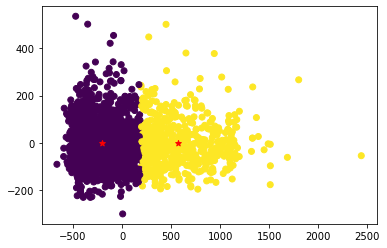

In [120]:
km=KMeans(n_clusters=2)
y_predicted = km.fit_predict(X_train)
y_predicted
plt.scatter(X_train[: ,0],X_train[: ,1],c=y_predicted)
center =km.cluster_centers_
plt.scatter(center[:,0],center[:,1],c="red",marker="*")
plt.show()